In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Week-6

**Note:**: 

- For questions that involve plotting, just enter $0$ as the answer in the portal.



## Dataset

Run the cell given below to generate the data-matrix $X$ and target vector $y$. $X$ is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. $y$ is of shape $(n,)$. You will be using this dataset for the rest of the assignment. 

**Do not edit this cell.**

In [ ]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y = True)

# set the random seed value to 0
np.random.seed(0)

## Problem 1
How many samples are there in the dataset?

### Answer
442

## Solution

In [ ]:
X.shape[0]

442

## Problem 2

How many features are there in the dataset?

### Answer

10


## Solution

In [ ]:
X.shape[1]

10

## Problem 3
Write a function `shuffle_data(X, y)` that returns the shuffled $X$ and $y$. 

Note that it should shuffle the data pairs $(x_i, y_i)$. 

What will be the mean of the first 5 values in $y$?

[NAT]

Answer: 180.4 (Range: 180-181)

In [ ]:
def shuffle_data(X, y):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    return X[indices], y[indices] 


X, y = shuffle_data(X, y)

y[0:5].mean()


180.4

## Problem 4

Write a function `train_test_split(X, y, test_size)` that divides the data (X, y) into $X_{train}$, $X_{test}$, $y_{train}$, $y_{test}$ respectively as per test_size which should be a value between 0 and 1.

That is, if test_size = $t$, then `int(t*n)` data points should go to test and the remaining data points should go to train.

$X_{train}$, $X_{test}$, $y_{train}$, $y_{test}$ should be returned by the function.

Set the test_size to be 0.25 and output the sum of all y values settling in $y_{test}$.

[NAT]

**Answer:** 16433 (No range required)







In [ ]:
def train_test_split(X, y, test_size):
    X, y = shuffle_data(X, y)
    num_train_data_points = len(y) - int(len(y) *test_size)
    X_train, X_test = X[:num_train_data_points], X[num_train_data_points:]
    y_train, y_test = y[:num_train_data_points], y[num_train_data_points:]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, 0.25)

y_test.sum()

16433.0

## Problem 5

What are the shapes of $X_{train}$, $X_{test}$, $y_{train}$, $y_{test}$ respectively?

[MCQ]

Options:

A. (75, 10), (25, 10), (75,), (25,)

B. (332,), (110,), (332, 10), (110, 10)

C. (332, 10), (110, 10), (332,), (110,)

D. (75,), (25,), (75, 10), (25, 10)

**Answer: C**


In [ ]:
X_train.shape

(332, 10)

In [ ]:
X_test.shape

(110, 10)

In [ ]:
y_train.shape

(332,)

In [ ]:
y_test.shape

(110,)

## Problem 6
Add a dummy feature, i.e., a column containing all 1's (as the first column) in $X_{train}$ and $X_{test}$.

Take the transpose of both $X_{train}$ and $X_{test}$.

What are the shapes of $X_{train}$ and $X_{test}$?

[MCQ]

Options:

A. (11, 110), (11, 332)

B. (11, 332), (11, 110)

C. (110, 11), (332, 11)

D. (332, 11), (110, 11)

**Answer:** B


In [ ]:
X_train = np.column_stack((np.ones(X_train.shape[0]), X_train)).T
X_test = np.column_stack((np.ones(X_test.shape[0]), X_test)).T

In [ ]:
X_train.shape

(11, 332)

In [ ]:
X_test.shape

(11, 110)

## Problem 7

Write a function `compute_weights(X, y)` that uses the closed form formula of linear regression and returns a weight vector.

Call this function by passing $X_{train}$ and $y_{train}$. As the dummy feature was added as the first column, the first value in the weight vector will be the intercept. What is its value (rounded to one decimal place)?

**Answer:** 152.9 (Range: 152 to 154)

In [ ]:
def weights(X, y): 
  return (np.linalg.pinv(X@(X.T)))@X@y

wts = weights(X_train, y_train)

In [ ]:
wts.round(1)

array([ 152.9,  -73.9, -261.3,  501.2,  288.6, -654.3,  443.2,   88.4,
        242.4,  664.4,   62.6])

## Problem 8

Write a function `MSE(X, y, w)` that returns the mean squared error for the given `X`, `y` as per `w` values.

Using this function, compute the train error and test error.

Note: Here `y` is the true `y` for `X`.

Compute both train and test error. 

What is the value of test error?

[NAT]

**Answer:** 
3296.4 (Range: 3295 to 3298)

In [ ]:
def MSE(X, y, w):
  return np.sum(((X.T)@w-y)**2)/X.shape[1]

In [ ]:
# train error_train, w, 
train_error = MSE(X_train, y_train, wts)
train_error

2771.093164840927

In [ ]:
# test error]
test_error = MSE(X_test, y_test, wts)
test_error

3296.443580041717

## Problem 9

Write a function `compute_weights_ridge(X, y)` that uses the closed form formula of Ridge regression and returns a weight vector.

Call this function by passing  `X_train`, `y_train` and 0.3 as the value of regularization strength. 


Find the sum of values in the weight vector obtained. How much reduction in total sum of weights is achieved with respect to the the weight vector obtained from 'plain' linear regression (without regularization) computed earlier.

[NAT]

**Answer:** 
922.93 (Range: 922 to 924)

In [ ]:

def weights_ridge(X, y, l): 
  return (np.linalg.pinv(X@(X.T) + l*np.eye((X.shape[0]))))@X@y

In [ ]:
wts_r = weights_ridge(X_train, y_train, 0.3)
wts_r.round(1)

array([ 152.8,  -34.5, -157.3,  378. ,  231.9,   15.6,  -21.1, -165.6,
        146.1,  313.2,  105.4])

In [ ]:
print(wts.round(1))
print(wts_r.round(1))

[ 152.9  -73.9 -261.3  501.2  288.6 -654.3  443.2   88.4  242.4  664.4
   62.6]
[ 152.8  -34.5 -157.3  378.   231.9   15.6  -21.1 -165.6  146.1  313.2
  105.4]


In [ ]:
print(wts.round(1).sum())
print(wts_r.round(1).sum())

1454.1999999999998
964.4999999999999


In [ ]:
wts.sum() - wts_r.sum()

922.9355539747978

## Problem 10

Compute the train error and test error. What is their absolute difference?

**Answer:** 754.007 (Range: 753 to 755)

In [ ]:
train_error = MSE(X_train, y_train, wts_r)
train_error

2892.827183539728

In [ ]:
test_error = MSE(X_test, y_test, wts_r)
test_error

3646.8346489173205

In [ ]:
np.abs(train_error - test_error)

754.0074653775923

## Problem 11

Use 10 different values between 0 and 5 as the regularization strength and keep a record of the weight vectors obtained for each. Further, calculate the sum of weights for each weight vector.

Plot these sums of weights (on y-axis) with respect to the regularization strength (on x-axis) and observe the reduction in (sum of) weights.

[NAT]

**Answer:** 0

In [ ]:
wts = []
wt_sums = []
for l in np.linspace(0, 5, 11):
  wts_r = weights_ridge(X_train, y_train, l)
  wts.append(wts_r)
  wt_sums.append(wts_r.sum())

In [ ]:
wts

[array([ 152.87413433,  -73.85307602, -261.32800947,  501.24144843,
         288.57167408, -654.31650805,  443.19018249,   88.39163948,
         242.36014651,  664.37341658,   62.61714581]),
 array([ 152.79832099,  -19.53783099, -120.79984157,  327.21109095,
         207.30418984,   28.20830442,   -7.28260295, -150.90564807,
         138.61412448,  272.42515381,  109.79288108]),
 array([ 1.52620296e+02,  1.89262504e-01, -7.10241960e+01,  2.48964002e+02,
         1.66543439e+02,  4.02550119e+01,  1.27783763e+01, -1.23895765e+02,
         1.22456792e+02,  2.12103394e+02,  1.05604508e+02]),
 array([ 152.40890927,    8.72980819,  -46.73022275,  203.23089392,
         140.70741606,   43.30546051,   21.44572828, -105.75567752,
         109.47817061,  176.69609058,   97.01263121]),
 array([152.18667549,  12.74182574, -32.92354623, 172.6568092 ,
        122.42109985,  43.33318732,  25.23888466, -92.57668696,
         98.90880626, 152.52931002,  88.65842517]),
 array([151.96044177,  14.64252985

In [ ]:
wt_sums

[1454.1221941768836,
 937.8281419828388,
 866.5951197713589,
 800.529208356417,
 743.1747905205685,
 694.0202350653716,
 651.818668949817,
 615.3584376866995,
 583.6203986188639,
 555.7820300772421,
 531.1866402020858]

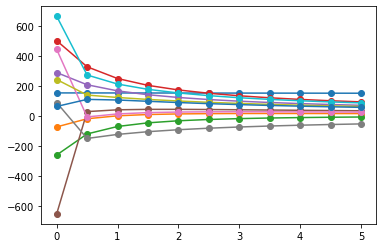

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(0, 5, 11), wts, 'o-')

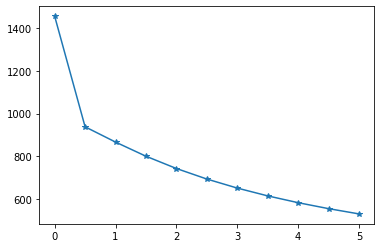

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(0, 5, 11), wt_sums, '*-')